<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

In [6]:
X = df.drop(columns=["TimeInShelterDays"])
y = df["TimeInShelterDays"]
X = np.array(X)
y = np.array(y)

In [74]:
def experiementarSVR(x, y, kernels, gammas, params_reg):
    """función que realiza experimentos sobre una SVM para regresión"""

    idx = 0
    kf = KFold(n_splits=4)
    resultados = pd.DataFrame()

    for kernel in kernels:
        for gamma in gammas:
            for param_reg in params_reg:
                print("parámetros usados", (kernel, gamma, param_reg))  # Para seguimiento
                errores_test = []
                pct_support_vectors = []
                num_support_vectors = []

                for train_index, test_index in kf.split(x):
                    X_train, X_test = x[train_index], x[test_index]
                    y_train, y_test = y[train_index], y[test_index]

                    # Definir y entrenar el modelo
                    if kernel == 'linear':
                      svr = svm.SVR(kernel=kernel, C=param_reg, max_iter=250)
                    else:
                      svr = svm.SVR(kernel=kernel, gamma=gamma, C=param_reg, max_iter=250)
                    svr.fit(X_train, y_train)

                    # Validación del modelo
                    ypred = svr.predict(X=X_test)

                    # MAPE de prueba
                    errores_test.append(mean_absolute_percentage_error(y_test, ypred))

                    # Número y % de vectores de soporte
                    num_vs = svr.support_.size
                    pct_vs = (num_vs / X_train.shape[0]) * 100

                    pct_support_vectors.append(pct_vs)
                    num_support_vectors.append(num_vs)

                # Guardar resultados
                resultados.loc[idx, 'kernel'] = kernel
                resultados.loc[idx, 'gamma'] = gamma
                resultados.loc[idx, 'param_reg'] = param_reg
                resultados.loc[idx, 'error de prueba (promedio)'] = np.mean(errores_test)
                resultados.loc[idx, 'error de prueba (intervalo de confianza)'] = np.std(errores_test)
                resultados.loc[idx, '# de vectores de soporte'] = np.mean(num_support_vectors)
                resultados.loc[idx, '% de vectores de soporte'] = np.mean(pct_support_vectors)

                idx += 1

    return resultados


In [ ]:
resultadosSVR = experiementarSVR(x =X,y=y,
                                 kernels=['linear', 'rbf'],
                                 gammas = [0.001,0.01,0.1],
                                 params_reg = [0.1, 0.5, 1.0, 1.5, 2, 2.5 ,10]
                                )

In [76]:
resultadosSVR.sort_values('error de prueba (promedio)',ascending=True).head(5)

,kernel,gamma,param_reg,error de prueba (promedio),error de prueba (intervalo de confianza),# de vectores de soporte,% de vectores de soporte
6,linear,0.001,10.0,1.521441,0.169611,499.5,33.183854
13,linear,0.010,10.0,1.521441,0.169611,499.5,33.183854
20,linear,0.100,10.0,1.521441,0.169611,499.5,33.183854
12,linear,0.010,2.5,1.593334,0.191513,500.0,33.217076
19,linear,0.100,2.5,1.593334,0.191513,500.0,33.217076


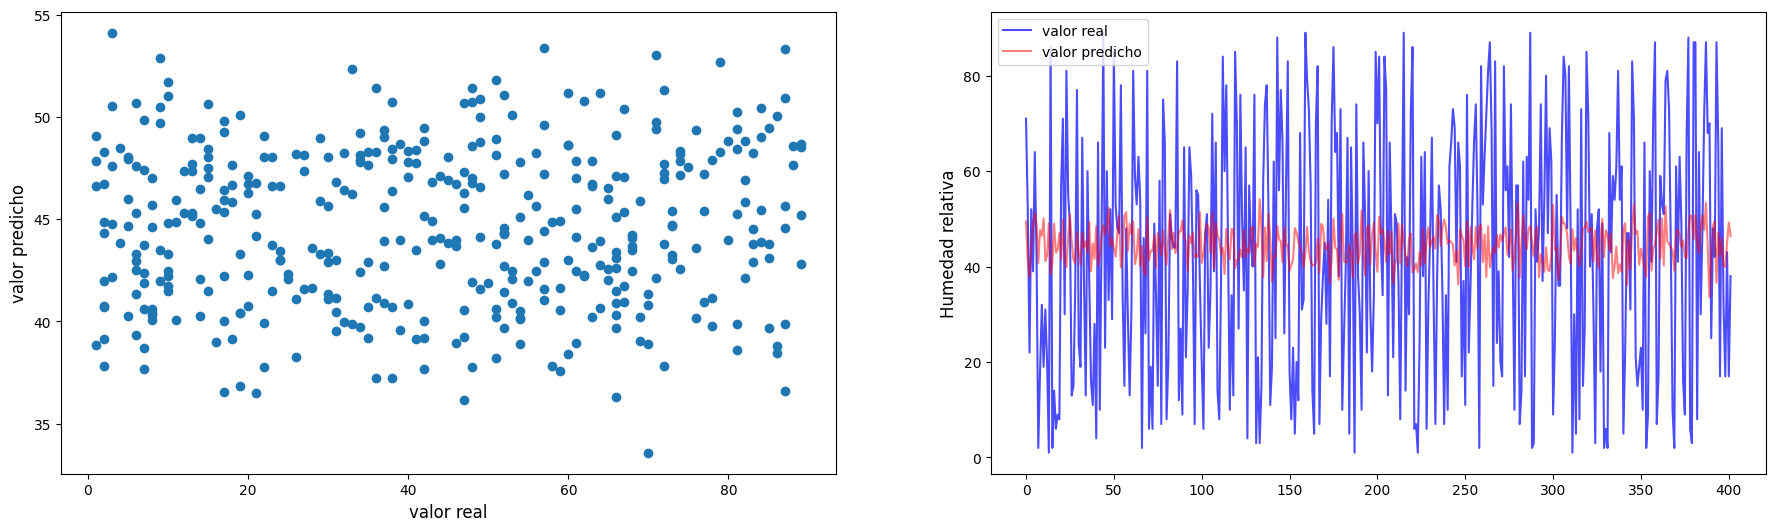

In [77]:
# dividir el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#predicciones
# OJO: Completar!
svr = svm.SVR(kernel='linear', gamma=0.01, C=10, max_iter=2000)
svr.fit(X_train, y_train)
Ypred =  svr.predict(X_test)

# plots

f, ax = plt.subplots(ncols=2, sharex=False, sharey=False, figsize = (22,6))
ax[0].scatter(y_test, Ypred)
ax[0].set_xlabel('valor real', fontdict = {'fontsize': 12})
ax[0].set_ylabel('valor predicho', fontdict = {'fontsize': 12})
ax[1].plot(y_test, label = 'valor real', color = 'b', alpha = 0.7)
ax[1].plot(Ypred, label = 'valor predicho', color = 'r', alpha = 0.5)
ax[1].legend()
ax[1].set_ylabel('Humedad relativa', fontdict = {'fontsize': 12})
plt.show()

In [78]:
def graficar_predicciones(y_real, y_predicho, cantidad_muestras):
    """
    Muestra una gráfica comparando los valores reales y predichos.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_real[:cantidad_muestras], label='Valor real', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_predicho[:cantidad_muestras], label='Valor predicho', marker='x', linestyle='--', alpha=0.7)
    plt.title('Comparación entre valores reales y predichos')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

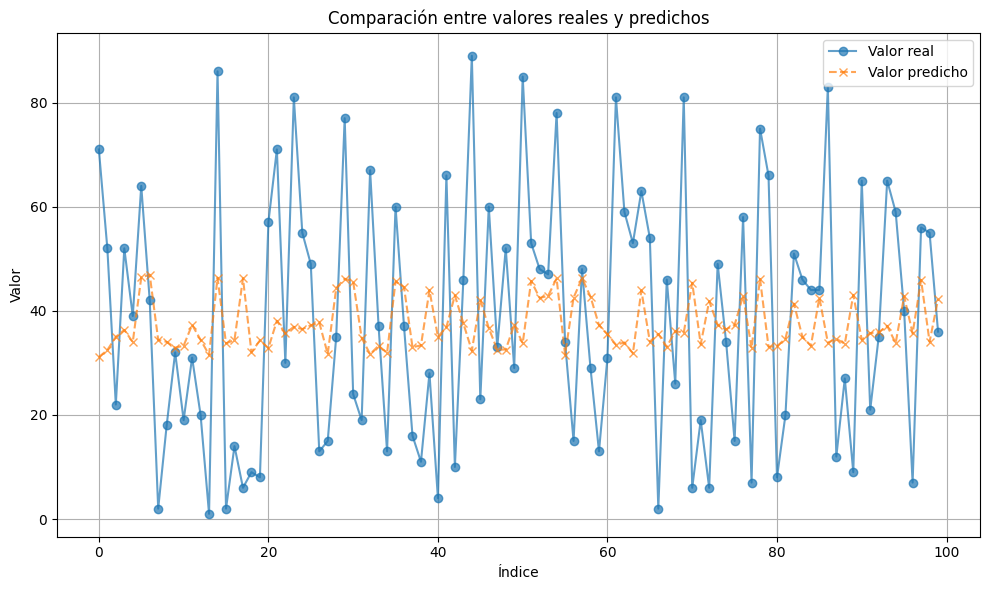

In [57]:
graficar_predicciones(y_test, Ypred, 100)